In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier


from sklearn.datasets import fetch_openml

import warnings
warnings.simplefilter('ignore')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier,BaggingClassifier


from sklearn.metrics import f1_score, confusion_matrix

# 데이터 불러오기

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 데이터 확인하기

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


# EDA

In [8]:
from matplotlib.gridspec import GridSpec
import seaborn as sns

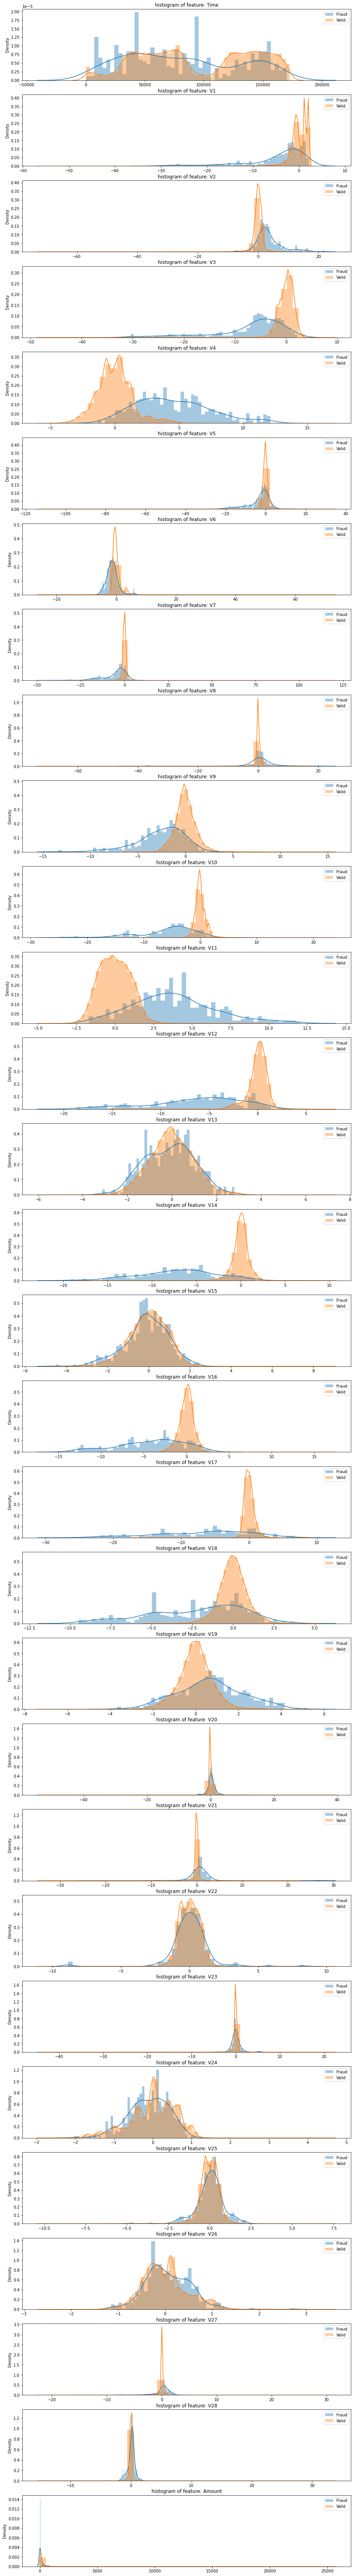

In [9]:
features = df.iloc[:,0:30].columns
plt.figure(figsize=(15,30*4))
gs = GridSpec(30, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.Class == 1], bins=50,label='Fraud') #사기
    sns.distplot(df[c][df.Class == 0], bins=50,label="Valid")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

# 타임에 의해서는 사기와, 유효한 거래가 확인이 불가능


Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

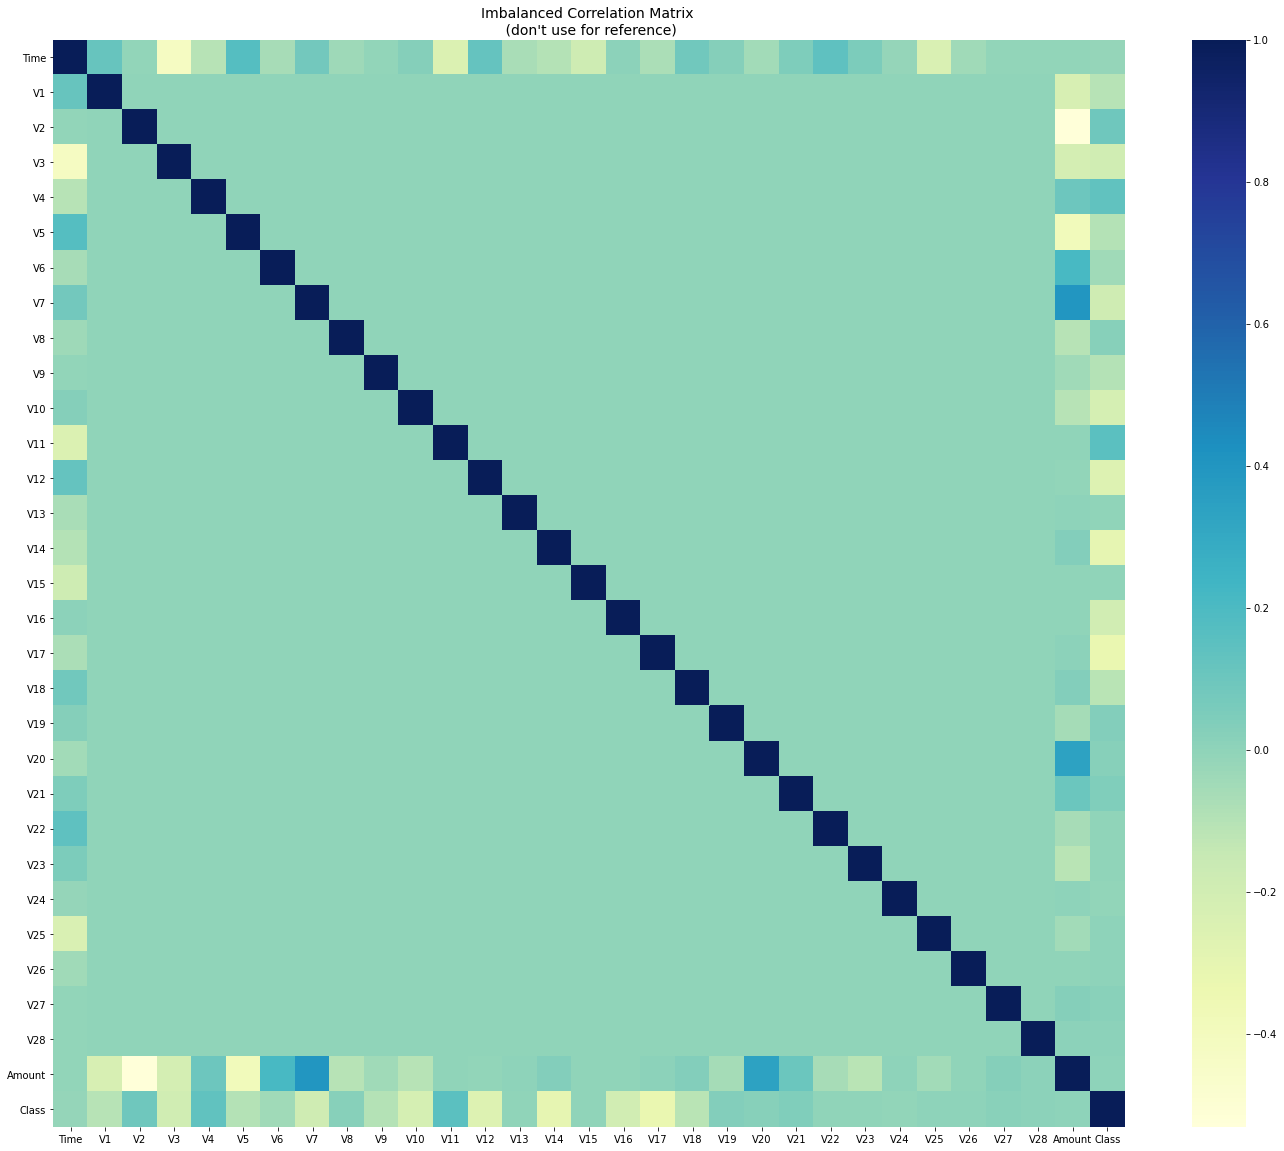

In [10]:
# corr 확인
f, ax1 = plt.subplots(figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(df.values, i )  for i in range( df.shape[1] ) ]
vif['features'] = df.columns
vif

# VIF를 확인했을때, amount를 보니 11이 나왔지만 변수의 속성에 대해서 제대로 파악을 할 수 없어
# 그대로 내비 뒀따리요~!

,VIF Factor,features
0,2.339858,Time
1,1.638237,V1
2,3.900804,V2
3,1.321018,V3
4,1.172479,V4
5,2.764441,V5
6,1.528629,V6
7,2.603517,V7
8,1.098591,V8
9,1.037715,V9


# 모델링 

In [12]:
x_df=df.iloc[:,:-1]
y_df=df['Class']

In [62]:
# train, test 분리
x_train, x_test, y_train, y_test=train_test_split(x_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

In [63]:
print(y_train.value_counts())
print(y_test.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

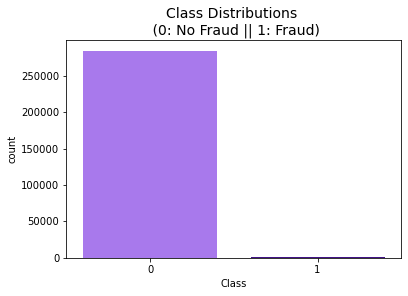

In [64]:
# 0과 1 Class에 대한 시각화
colors = ["#A566FF", "#3F0099"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

상대적으로 0(vaild)이 많이 나왔고, 1(Fraud)가 적었다.

-- logistic, decision tree, KNN 3가지 모델 사용

In [65]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier()
}

In [66]:
for key, classifier in classifiers.items():
    model_r=make_pipeline(StandardScaler(), classifier)
    model_r.fit(x_train, y_train)
    
    p = model_r.predict(x_test)
    fscore= f1_score(y_test, p)
    score=model_r.score(x_train, y_train)
   
    print("Classifiers: ", classifier.__class__.__name__,'trainscore: ', score )
    print("Classifiers: ", classifier.__class__.__name__, 'f1_score(test)',fscore)

Classifiers:  LogisticRegression trainscore:  0.99923632293884
Classifiers:  LogisticRegression f1_score(test) 0.7314285714285713
Classifiers:  DecisionTreeClassifier trainscore:  1.0
Classifiers:  DecisionTreeClassifier f1_score(test) 0.7373737373737373
Classifiers:  KNeighborsClassifier trainscore:  0.9995786609317738
Classifiers:  KNeighborsClassifier f1_score(test) 0.858695652173913


f1 score를 비교해보니, 결과가 별로 좋지 않은 것을 확인 할 수 있습니다.

## undersampling

In [67]:
x_data= x_train.copy()
y_data = y_train.copy()
train_df = x_data 
train_df['Class']= y_data

# train_df를 무작위로 섞어 놓기
train_df = train_df.sample(frac=1)

fraud_df = train_df.loc[train_df['Class'] == 1]
non_fraud_df = train_df.loc[train_df['Class'] == 0][:394]


normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

y_train = new_df['Class']
x_train = new_df.drop('Class', axis=1)

In [68]:
train_df.value_counts('Class')

Class
0    227451
1       394
dtype: int64

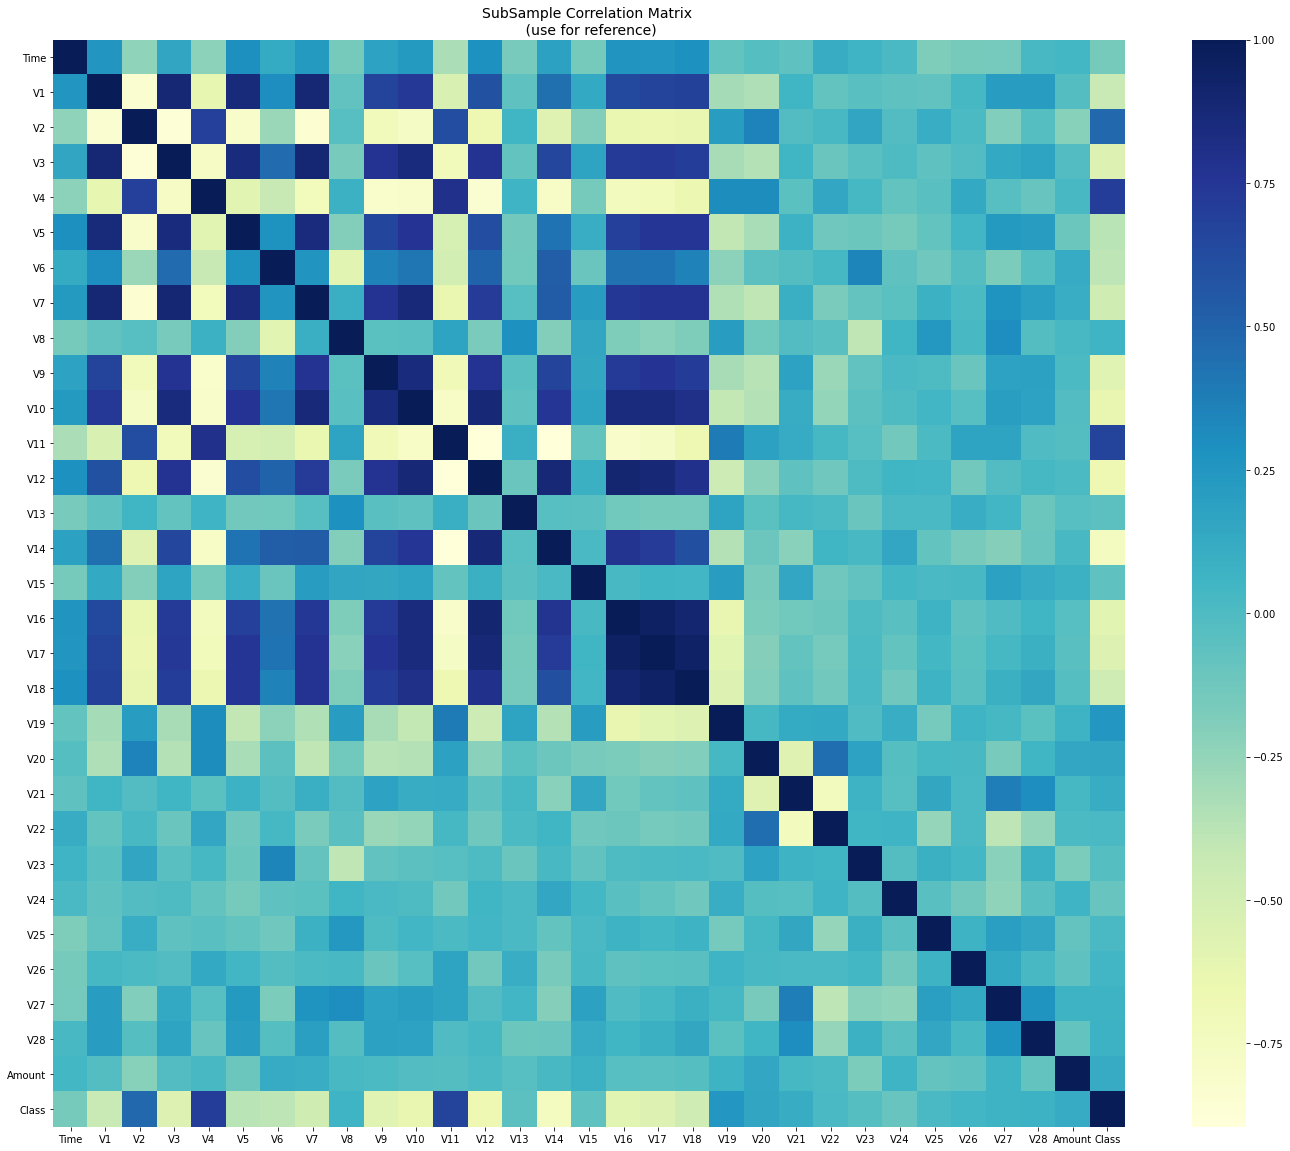

In [47]:
# df를 undersampling한 데이터 프레임 
f, ax2 = plt.subplots(figsize=(24,20))

new_df = normal_distributed_df.sample(frac=1, random_state=42)

sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr,cmap='YlGnBu', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Class Distributions')

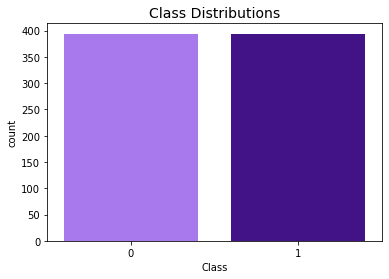

In [69]:
colors = ["#A566FF", "#3F0099"]
sns.countplot('Class', data=new_df, palette=colors)
plt.title('Class Distributions', fontsize=14)

==> undersampling의 결과, 0과 1을 균등하게 분배함.

## undersampling한 데이터로 다시 모델링

In [49]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier()
}

In [50]:
for key, classifier in classifiers.items():
    model_r=make_pipeline(StandardScaler(), classifier)
    model_r.fit(x_train, y_train)
    
    p = model_r.predict(x_test)
    fscore= f1_score(y_test, p)
    score=model_r.score(x_train, y_train)
   
    print("Classifiers: ", classifier.__class__.__name__,'trainscore: ', score )
    print("Classifiers: ", classifier.__class__.__name__, 'f1_score(test)',fscore)

Classifiers:  LogisticRegression trainscore:  0.9477707006369427
Classifiers:  LogisticRegression f1_score(test) 0.11688311688311688
Classifiers:  DecisionTreeClassifier trainscore:  1.0
Classifiers:  DecisionTreeClassifier f1_score(test) 0.0308466051969824
Classifiers:  KNeighborsClassifier trainscore:  0.9299363057324841
Classifiers:  KNeighborsClassifier f1_score(test) 0.08599033816425122


## Lightbgm 모델

In [51]:
from lightgbm import LGBMClassifier

In [52]:
model_lgb = make_pipeline(StandardScaler(), LGBMClassifier())
param_value={'lgbmclassifier__max_depth':[-1]}
grids=GridSearchCV(model_lgb, param_grid=param_value, scoring='f1')
grids.fit(x_train, y_train)


#LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)


p = grids.best_estimator_.predict(x_test)
fscore= f1_score(y_test, p)
#score=grids.best_score_(x_train, y_train)

#print("Classifiers: ", classifier.__class__.__name__,'trainscore: ', score )
print( 'f1_score(test)',fscore)

f1_score(test) 0.09172482552342973


PCA로 차원을 축소해서 모델링을 했는데 역시 결과는 안 좋았다.

## 딥러닝

In [72]:
import tensorflow as tf
from tensorflow import keras

In [73]:
model_tf = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation='softmax')
])

In [74]:
model_tf.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model_tf.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
25/25 [==============================] - 0s 997us/step - loss: 10629.5439 - accuracy: 0.2119
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 2921.0200 - accuracy: 0.4721
Epoch 3/1000
25/25 [==============================] - 0s 1ms/step - loss: 2356.6089 - accuracy: 0.5178
Epoch 4/1000
25/25 [==============================] - 0s 857us/step - loss: 2314.5903 - accuracy: 0.4987
Epoch 5/1000
25/25 [==============================] - 0s 873us/step - loss: 1858.7687 - accuracy: 0.5140
Epoch 6/1000
25/25 [==============================] - 0s 829us/step - loss: 1823.1007 - accuracy: 0.4886
Epoch 7/1000
25/25 [==============================] - 0s 769us/step - loss: 1597.0238 - accuracy: 0.5305
Epoch 8/1000
25/25 [==============================] - 0s 788us/step - loss: 1751.8555 - accuracy: 0.5089
Epoch 9/1000
25/25 [==============================] - 0s 914us/step - loss: 1621.8881 - accuracy: 0.5102
Epoch 10/1000
25/25 [==============================] - 0s 

25/25 [==============================] - 0s 1ms/step - loss: 13.7394 - accuracy: 0.6447
Epoch 80/1000
25/25 [==============================] - 0s 1ms/step - loss: 5.8543 - accuracy: 0.7018
Epoch 81/1000
25/25 [==============================] - 0s 1ms/step - loss: 10.7308 - accuracy: 0.6371
Epoch 82/1000
25/25 [==============================] - 0s 1ms/step - loss: 8.4136 - accuracy: 0.6688
Epoch 83/1000
25/25 [==============================] - 0s 1ms/step - loss: 9.4005 - accuracy: 0.6586
Epoch 84/1000
25/25 [==============================] - 0s 1ms/step - loss: 5.2603 - accuracy: 0.6612
Epoch 85/1000
25/25 [==============================] - 0s 1ms/step - loss: 18.7235 - accuracy: 0.5939
Epoch 86/1000
25/25 [==============================] - 0s 997us/step - loss: 17.2306 - accuracy: 0.5952
Epoch 87/1000
25/25 [==============================] - 0s 914us/step - loss: 17.5297 - accuracy: 0.6307
Epoch 88/1000
25/25 [==============================] - 0s 790us/step - loss: 19.4980 - accuracy:

25/25 [==============================] - 0s 744us/step - loss: 2.2658 - accuracy: 0.7640
Epoch 159/1000
25/25 [==============================] - 0s 890us/step - loss: 1.7810 - accuracy: 0.7614
Epoch 160/1000
25/25 [==============================] - 0s 831us/step - loss: 2.1546 - accuracy: 0.7640
Epoch 161/1000
25/25 [==============================] - 0s 783us/step - loss: 1.7537 - accuracy: 0.7906
Epoch 162/1000
25/25 [==============================] - 0s 770us/step - loss: 2.8110 - accuracy: 0.7487
Epoch 163/1000
25/25 [==============================] - 0s 706us/step - loss: 2.2294 - accuracy: 0.7602
Epoch 164/1000
25/25 [==============================] - 0s 748us/step - loss: 2.6162 - accuracy: 0.7462
Epoch 165/1000
25/25 [==============================] - 0s 831us/step - loss: 1.3346 - accuracy: 0.7893
Epoch 166/1000
25/25 [==============================] - 0s 734us/step - loss: 3.5289 - accuracy: 0.7322
Epoch 167/1000
25/25 [==============================] - ETA: 0s - loss: 1.9926 

25/25 [==============================] - 0s 831us/step - loss: 0.2995 - accuracy: 0.8972
Epoch 237/1000
25/25 [==============================] - 0s 764us/step - loss: 0.3174 - accuracy: 0.8934
Epoch 238/1000
25/25 [==============================] - 0s 914us/step - loss: 0.4164 - accuracy: 0.8515
Epoch 239/1000
25/25 [==============================] - 0s 748us/step - loss: 0.3198 - accuracy: 0.8896
Epoch 240/1000
25/25 [==============================] - 0s 844us/step - loss: 0.3995 - accuracy: 0.8464
Epoch 241/1000
25/25 [==============================] - 0s 777us/step - loss: 0.4079 - accuracy: 0.8503
Epoch 242/1000
25/25 [==============================] - 0s 790us/step - loss: 0.3787 - accuracy: 0.8477
Epoch 243/1000
25/25 [==============================] - 0s 706us/step - loss: 0.5721 - accuracy: 0.8274
Epoch 244/1000
25/25 [==============================] - 0s 790us/step - loss: 0.4460 - accuracy: 0.8261
Epoch 245/1000
25/25 [==============================] - 0s 790us/step - loss: 0

25/25 [==============================] - 0s 829us/step - loss: 0.4191 - accuracy: 0.8173
Epoch 315/1000
25/25 [==============================] - 0s 790us/step - loss: 0.3893 - accuracy: 0.8325
Epoch 316/1000
25/25 [==============================] - 0s 790us/step - loss: 0.3396 - accuracy: 0.8566
Epoch 317/1000
25/25 [==============================] - 0s 835us/step - loss: 0.3445 - accuracy: 0.8515
Epoch 318/1000
25/25 [==============================] - 0s 830us/step - loss: 0.4067 - accuracy: 0.8236
Epoch 319/1000
25/25 [==============================] - 0s 748us/step - loss: 0.3908 - accuracy: 0.8185
Epoch 320/1000
25/25 [==============================] - 0s 796us/step - loss: 0.4038 - accuracy: 0.8287
Epoch 321/1000
25/25 [==============================] - 0s 790us/step - loss: 0.3773 - accuracy: 0.8388
Epoch 322/1000
25/25 [==============================] - 0s 873us/step - loss: 0.3627 - accuracy: 0.8325
Epoch 323/1000
25/25 [==============================] - 0s 914us/step - loss: 0

25/25 [==============================] - 0s 693us/step - loss: 0.4023 - accuracy: 0.8223
Epoch 394/1000
25/25 [==============================] - 0s 706us/step - loss: 0.5626 - accuracy: 0.6739
Epoch 395/1000
25/25 [==============================] - 0s 707us/step - loss: 0.4682 - accuracy: 0.7652
Epoch 396/1000
25/25 [==============================] - 0s 706us/step - loss: 0.4998 - accuracy: 0.7297
Epoch 397/1000
25/25 [==============================] - 0s 706us/step - loss: 0.6618 - accuracy: 0.6015
Epoch 398/1000
25/25 [==============================] - 0s 814us/step - loss: 0.6589 - accuracy: 0.6003
Epoch 399/1000
25/25 [==============================] - 0s 914us/step - loss: 0.6435 - accuracy: 0.5977
Epoch 400/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.6434
Epoch 401/1000
25/25 [==============================] - 0s 873us/step - loss: 0.5764 - accuracy: 0.6815
Epoch 402/1000
25/25 [==============================] - 0s 831us/step - loss: 0.5

25/25 [==============================] - 0s 665us/step - loss: 0.4941 - accuracy: 0.7779
Epoch 472/1000
25/25 [==============================] - 0s 623us/step - loss: 0.4910 - accuracy: 0.7881
Epoch 473/1000
25/25 [==============================] - 0s 618us/step - loss: 0.5063 - accuracy: 0.8122
Epoch 474/1000
25/25 [==============================] - 0s 665us/step - loss: 0.5746 - accuracy: 0.7119
Epoch 475/1000
25/25 [==============================] - 0s 665us/step - loss: 0.4627 - accuracy: 0.8109
Epoch 476/1000
25/25 [==============================] - 0s 623us/step - loss: 0.4545 - accuracy: 0.8084
Epoch 477/1000
25/25 [==============================] - 0s 623us/step - loss: 0.4740 - accuracy: 0.7957
Epoch 478/1000
25/25 [==============================] - 0s 665us/step - loss: 0.4203 - accuracy: 0.8261
Epoch 479/1000
25/25 [==============================] - 0s 623us/step - loss: 0.4593 - accuracy: 0.8084
Epoch 480/1000
25/25 [==============================] - 0s 665us/step - loss: 0

25/25 [==============================] - 0s 914us/step - loss: 0.4304 - accuracy: 0.8249
Epoch 550/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8845
Epoch 551/1000
25/25 [==============================] - 0s 654us/step - loss: 0.2965 - accuracy: 0.8972
Epoch 552/1000
25/25 [==============================] - 0s 665us/step - loss: 0.3143 - accuracy: 0.8756
Epoch 553/1000
25/25 [==============================] - 0s 582us/step - loss: 0.3062 - accuracy: 0.8947
Epoch 554/1000
25/25 [==============================] - 0s 623us/step - loss: 0.3523 - accuracy: 0.8693
Epoch 555/1000
25/25 [==============================] - 0s 582us/step - loss: 0.6159 - accuracy: 0.7259
Epoch 556/1000
25/25 [==============================] - 0s 623us/step - loss: 0.4423 - accuracy: 0.8236
Epoch 557/1000
25/25 [==============================] - 0s 582us/step - loss: 0.4021 - accuracy: 0.8541
Epoch 558/1000
25/25 [==============================] - 0s 706us/step - loss: 0.3

Epoch 628/1000
25/25 [==============================] - 0s 832us/step - loss: 0.3485 - accuracy: 0.8541
Epoch 629/1000
25/25 [==============================] - 0s 830us/step - loss: 0.2819 - accuracy: 0.8858
Epoch 630/1000
25/25 [==============================] - 0s 831us/step - loss: 0.3070 - accuracy: 0.8832
Epoch 631/1000
25/25 [==============================] - 0s 790us/step - loss: 0.3399 - accuracy: 0.8706
Epoch 632/1000
25/25 [==============================] - 0s 748us/step - loss: 0.4209 - accuracy: 0.8249
Epoch 633/1000
25/25 [==============================] - 0s 914us/step - loss: 0.3610 - accuracy: 0.8503
Epoch 634/1000
25/25 [==============================] - 0s 706us/step - loss: 0.3739 - accuracy: 0.8515
Epoch 635/1000
25/25 [==============================] - 0s 748us/step - loss: 0.3140 - accuracy: 0.8807
Epoch 636/1000
25/25 [==============================] - 0s 623us/step - loss: 0.2956 - accuracy: 0.8921
Epoch 637/1000
25/25 [==============================] - 0s 665us

25/25 [==============================] - 0s 706us/step - loss: 0.3567 - accuracy: 0.8503
Epoch 707/1000
25/25 [==============================] - 0s 748us/step - loss: 0.4132 - accuracy: 0.8274
Epoch 708/1000
25/25 [==============================] - 0s 790us/step - loss: 0.4538 - accuracy: 0.7944
Epoch 709/1000
25/25 [==============================] - 0s 665us/step - loss: 0.4155 - accuracy: 0.8147
Epoch 710/1000
25/25 [==============================] - 0s 665us/step - loss: 0.3990 - accuracy: 0.8274
Epoch 711/1000
25/25 [==============================] - 0s 623us/step - loss: 0.5659 - accuracy: 0.7259
Epoch 712/1000
25/25 [==============================] - 0s 748us/step - loss: 0.3568 - accuracy: 0.8579
Epoch 713/1000
25/25 [==============================] - 0s 623us/step - loss: 0.3383 - accuracy: 0.8655
Epoch 714/1000
25/25 [==============================] - 0s 665us/step - loss: 0.3580 - accuracy: 0.8503
Epoch 715/1000
25/25 [==============================] - 0s 665us/step - loss: 0

25/25 [==============================] - 0s 831us/step - loss: 0.3287 - accuracy: 0.8807
Epoch 785/1000
25/25 [==============================] - 0s 914us/step - loss: 0.3980 - accuracy: 0.8287
Epoch 786/1000
25/25 [==============================] - 0s 788us/step - loss: 0.3450 - accuracy: 0.8693
Epoch 787/1000
25/25 [==============================] - 0s 833us/step - loss: 0.3351 - accuracy: 0.8731
Epoch 788/1000
25/25 [==============================] - 0s 831us/step - loss: 0.4567 - accuracy: 0.7741
Epoch 789/1000
25/25 [==============================] - 0s 831us/step - loss: 0.5645 - accuracy: 0.6865
Epoch 790/1000
25/25 [==============================] - 0s 663us/step - loss: 0.4117 - accuracy: 0.8096
Epoch 791/1000
25/25 [==============================] - 0s 706us/step - loss: 0.3876 - accuracy: 0.8312
Epoch 792/1000
25/25 [==============================] - 0s 748us/step - loss: 0.5389 - accuracy: 0.7056
Epoch 793/1000
25/25 [==============================] - 0s 914us/step - loss: 0

25/25 [==============================] - 0s 789us/step - loss: 0.4773 - accuracy: 0.7627
Epoch 863/1000
25/25 [==============================] - 0s 913us/step - loss: 0.4162 - accuracy: 0.8109
Epoch 864/1000
25/25 [==============================] - 0s 873us/step - loss: 0.4800 - accuracy: 0.7576
Epoch 865/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8655
Epoch 866/1000
25/25 [==============================] - 0s 748us/step - loss: 0.3360 - accuracy: 0.8642
Epoch 867/1000
25/25 [==============================] - 0s 748us/step - loss: 0.3742 - accuracy: 0.8363
Epoch 868/1000
25/25 [==============================] - 0s 707us/step - loss: 0.5089 - accuracy: 0.7373
Epoch 869/1000
25/25 [==============================] - 0s 665us/step - loss: 0.3571 - accuracy: 0.8503
Epoch 870/1000
25/25 [==============================] - 0s 665us/step - loss: 0.3401 - accuracy: 0.8680
Epoch 871/1000
25/25 [==============================] - 0s 650us/step - loss: 0.3

25/25 [==============================] - 0s 748us/step - loss: 0.3708 - accuracy: 0.8553
Epoch 942/1000
25/25 [==============================] - 0s 789us/step - loss: 0.3794 - accuracy: 0.8452
Epoch 943/1000
25/25 [==============================] - 0s 728us/step - loss: 0.3677 - accuracy: 0.8541
Epoch 944/1000
25/25 [==============================] - 0s 753us/step - loss: 0.3663 - accuracy: 0.8515
Epoch 945/1000
25/25 [==============================] - 0s 706us/step - loss: 0.3476 - accuracy: 0.8668
Epoch 946/1000
25/25 [==============================] - 0s 749us/step - loss: 0.3487 - accuracy: 0.8655
Epoch 947/1000
25/25 [==============================] - 0s 665us/step - loss: 0.3422 - accuracy: 0.8655
Epoch 948/1000
25/25 [==============================] - 0s 623us/step - loss: 0.3386 - accuracy: 0.8655
Epoch 949/1000
25/25 [==============================] - 0s 623us/step - loss: 0.3585 - accuracy: 0.8503
Epoch 950/1000
25/25 [==============================] - 0s 623us/step - loss: 0

In [70]:
x_test.shape

(56962, 30)

In [71]:
x_train.shape

(788, 30)

In [76]:
model_tf.evaluate(x_test,  y_test, verbose=10)

[0.30668795108795166, 0.9914855360984802]

0.9914855360984802로 상당히 높은 예측력을 가지고 있음을 확인 할 수 있습니다.

## Upsampling

In [103]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [104]:
x_df=df.iloc[:,:-1]
y_df=df['Class']

In [105]:
# train, test 분리
x_train, x_test, y_train, y_test=train_test_split(x_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

In [106]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
xsm_train, ysm_train = sm.fit_resample(x_train, y_train)

In [107]:
ysm_train.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions')

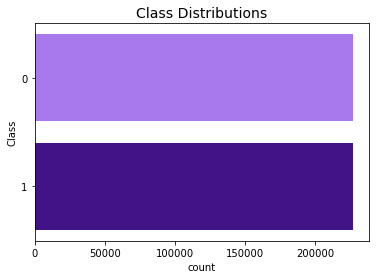

In [112]:
colors = ["#A566FF", "#3F0099"]
sns.countplot(y=ysm_train,
            palette=colors)
plt.title('Class Distributions', fontsize=14)

각각 gridsearch 를 사용해서 최대한 파라미터 조정을 한후 voting 에 반영

In [111]:
model_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=9))
model_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=20))
model_lgbm=make_pipeline(StandardScaler(), LGBMClassifier(num_leaves=36))
model_rf=make_pipeline(StandardScaler(),RandomForestClassifier())

model_vote = VotingClassifier(estimators=[('lgbm', model_lgbm), ('knn', model_knn),('d-tree', model_dt),('rf',model_rf)])

model_vote.fit(xsm_train, ysm_train)


y_pred_vote=model_vote.predict(x_test)
f1_score(y_test,y_pred_vote)

0.8426395939086294

==> Undersampling 한 것을 가지고 딥러닝한 결과: 0.8426395939086294

# 결론

Voting : logi + KNeighborsClassifier + DecisionTreeClassifier

Voting + Baggin : AdaBoostClassifier + BaggingClassifier + LogisticRegression + DecisionTreeClassifier + KNeighborsClassifier

## UnderSampling Score
|Model|Score|Type|
|-----|-----|-----|
|Logi|0.09379885356956748|f1_score|
|KNN| 0.0614004829251466|f1_score|
|D-Tree |0.1613198900091659|f1_score|
|Voting| 0.9349269588313414|f1_score|
|Rand Forest| 0.9261213720316622|f1_score|
|Voting + Bagging| 0.9173126614987079|f1_score|
|MLP |0.0|f1_score|
|TF| 0.9916435480117798|Eval_score|

## UpSampling Score
|Model|Score|Type|
|-----|-----|-----|
|Logi|0.7200000000000001|f1_score|
|KNN| 0.8502994011976047|f1_score|
|D-Tree |0.7252747252747253|f1_score|
|Voting|0.8395061728395062|f1_score|
|Rand Forest|0.8795180722891566|f1_score|
|Voting + Bagging|0.8407643312101911|f1_score|
|MLP |0.0|f1_score|
|TF| 0.998420000076294|Eval_score|

## 시사점

* 샘플링 후, 단일 모델에 의한 결과로는 Up Sampling을 하는 경우가 더 f1_score가 높게 나온다.
* 샘플링 후, 앙상블 학습을 적용 시킬경우, Under Sampling을 하는 경우가 더 f1_score가 높게 나온다.
* 추가적으로 MLPClassifier를 적용 시켜 딥러닝을 수행하였을경우, 거의 맞추지 못한다...일반 모델의 score로는 0.44가량이 나오지만 f1_score는 0이다(Under, Up Sampling 모두에서).
* Tensorflow를 통해 학습을 시켤경우, UnderSampling의 경우 표본의 수가 적다보니, epoch가 100~500 단위 이상이 되어야 0.96가량의 f1_score가 나오고, 표본수가 많은 UpSampling의 경우엔 epoch를 10만 주어도 0.99 가량의 f1_score가 나온다.